In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [45]:
rs=pd.read_csv('/content/historical_automobile_sales.csv')
rs

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


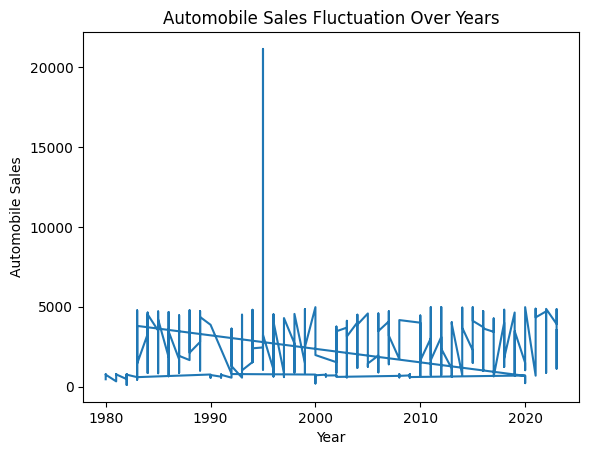

In [40]:
# Q 1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year.
plt.plot(rs['Year'], rs['Automobile_Sales'])
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales Fluctuation Over Years')
plt.show()

In [41]:
rs["Vehicle_Type"].unique()

array(['Supperminicar', 'Mediumfamilycar', 'Smallfamiliycar', 'Sports',
       'Executivecar'], dtype=object)

<Figure size 600x200 with 0 Axes>

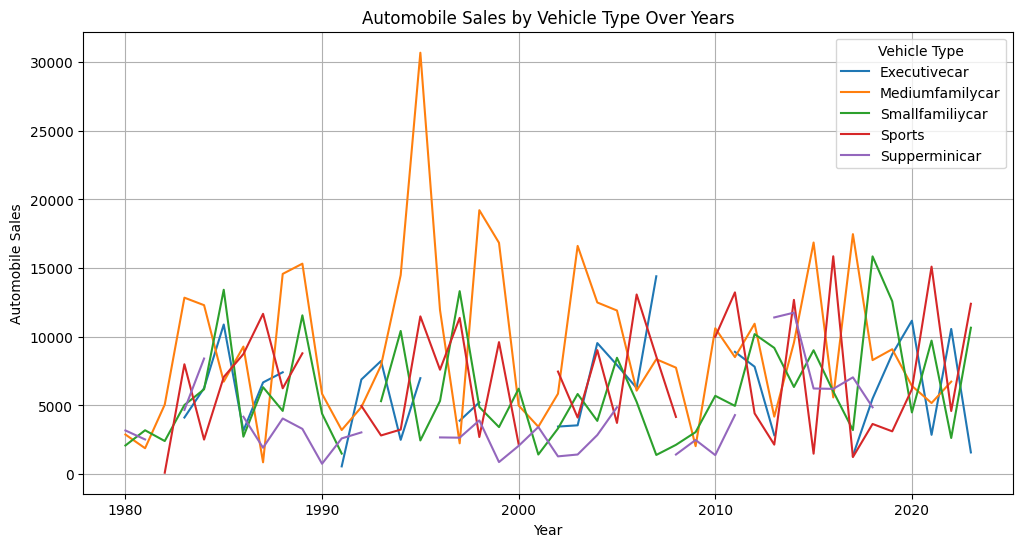

In [42]:
# Q 2: Plot different lines for categories of vehicle type and analyze the trend to answer the question Is there a noticeable difference in sales trends
# between different vehicle types during recession periods?
# Group the data by Year and Vehicle_Type and sum the Automobile_Sales
sales_by_vehicle_type = rs.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

# Plot the sales for each vehicle type over the years
plt.figure(figsize=(6,2))
sales_by_vehicle_type.plot(kind='line', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales by Vehicle Type Over Years')
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.show()

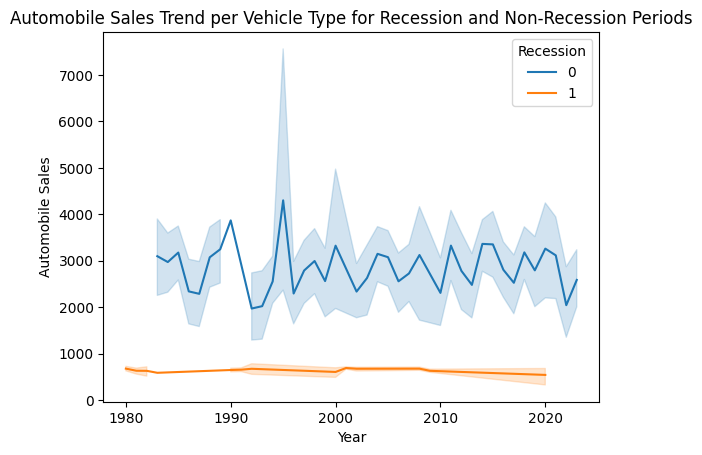

In [53]:
#Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non- recession period.
sns.lineplot(x='Year', y='Automobile_Sales', hue='Recession', data=rs)
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales Trend per Vehicle Type for Recession and Non-Recession Periods')
plt.show()

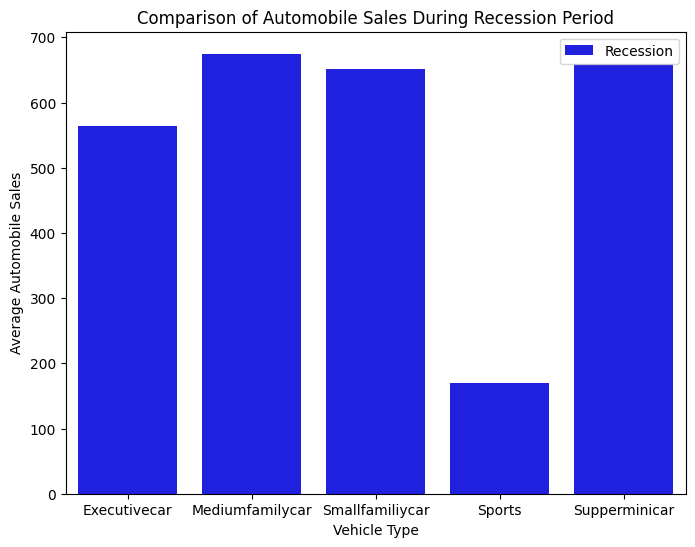

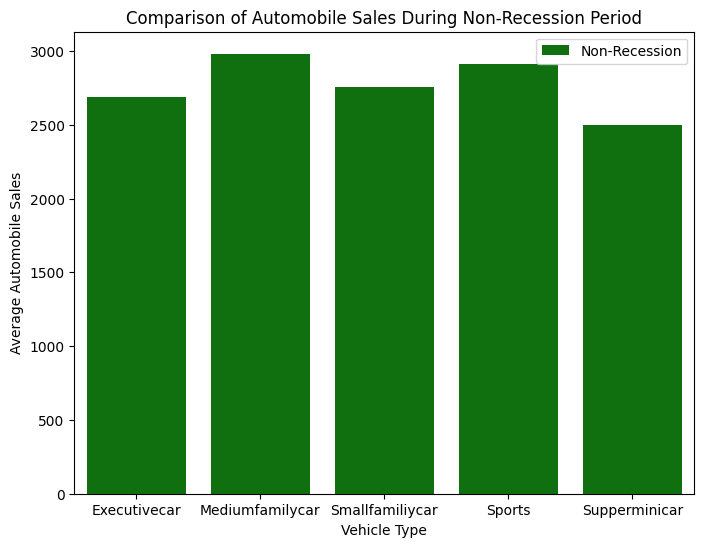

In [49]:
# Q 4: Now you want to compare the sales of different vehicle types during a recession and a non-recession period.
# Hint: To visualize sales of different vehicles during recession and non- recession periods, you
# can use a bar chart. You will need to group Recession, Vehicle_Typefor average
# Automobile_Sales and then plot it. Make use of sns. bar plot (x=x, y=data = df))

recession_data = rs[rs['Recession'] == 1]
non_recession_data = rs[rs['Recession'] == 0]

recession_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean()
non_recession_sales = non_recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean()

plt.figure(figsize=(8,6))
sns.barplot(x=recession_sales.index, y=recession_sales.values, label='Recession', color='blue')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Automobile Sales')
plt.title('Comparison of Automobile Sales During Recession Period')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(x=non_recession_sales.index, y=non_recession_sales.values, label='Non-Recession', color='green')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Automobile Sales')
plt.title('Comparison of Automobile Sales During Non-Recession Period')
plt.legend()
plt.show()